<a href="https://colab.research.google.com/github/T1210Taichi/Temperature-Difference/blob/main/2000%E3%81%8B%E3%82%892021%E5%B9%B4%E3%81%AE%E6%9C%80%E9%AB%98%E6%B0%97%E6%B8%A9%E3%81%A8%E6%9C%80%E4%BD%8E%E6%B0%97%E6%B8%A9%E3%81%AE%E5%B7%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 鳥取のCSVファイルを読み込む

　気象庁の2000年1月から2021年１月までの最高気温と最低気温を利用する。

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pylab as plt

In [11]:
#CSVのインポート
data_Tottori = pd.read_csv('drive/My Drive/Temperature/2000to2021_Tottori.csv',encoding="shift-jis",header=4,index_col=0)

In [12]:
data_Tottori.head()

,Unnamed: 1,Unnamed: 2
2000/1,17.0,-3.7
2000/2,13.7,-2.3
2000/3,19.7,-2.2
2000/4,21.9,1.3
2000/5,29.4,7.1


In [13]:
#上から４行取り除く
data_Tottori.columns = {"Max","Min"}
data_Tottori

,Max,Min
2000/1,17.0,-3.7
2000/2,13.7,-2.3
2000/3,19.7,-2.2
2000/4,21.9,1.3
2000/5,29.4,7.1
...,...,...
2020/9,37.5,13.8
2020/10,28.2,6.7
2020/11,25.6,3.9
2020/12,16.6,0.0


# 鳥取の「最高気温、最低気温、寒暖差」のグラフ

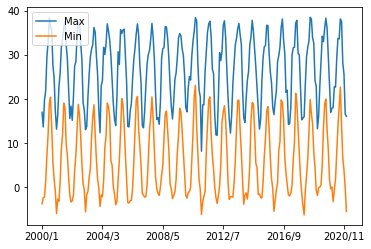

In [14]:
data_Tottori.plot()

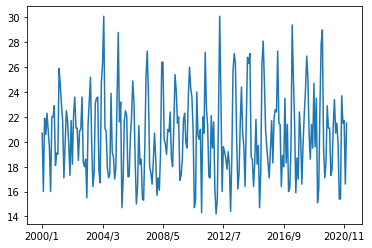

In [15]:
#最高気温と最低気温の差を算出
data_Tottori["Max-Min"] = data_Tottori["Max"] - data_Tottori["Min"]
data_Tottori["Max-Min"].plot()

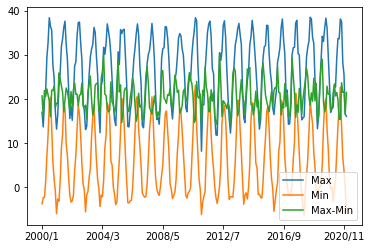

In [16]:
data_Tottori.plot()

# 東京のCSVファイルを読み込む

In [19]:
#CSVのインポート
data_Tokyo = pd.read_csv('drive/My Drive/Temperature/200001to202101_Tokyo.csv',encoding="shift-jis",header=4,index_col=0)

In [20]:
data_Tokyo

,Unnamed: 1,Unnamed: 2
2000/1,16.9,-0.7
2000/2,14.5,0.0
2000/3,19.9,1.5
2000/4,24.1,6.4
2000/5,30.0,12.9
...,...,...
2020/9,35.1,14.7
2020/10,26.7,9.2
2020/11,24.9,5.2
2020/12,17.2,-0.6


In [22]:
data_Tokyo.columns={"Max","Min"}
data_Tokyo["Max-Min"] = data_Tokyo["Max"] - data_Tokyo["Min"]
data_Tokyo

,Max,Min,Max-Min
2000/1,16.9,-0.7,17.6
2000/2,14.5,0.0,14.5
2000/3,19.9,1.5,18.4
2000/4,24.1,6.4,17.7
2000/5,30.0,12.9,17.1
...,...,...,...
2020/9,35.1,14.7,20.4
2020/10,26.7,9.2,17.5
2020/11,24.9,5.2,19.7
2020/12,17.2,-0.6,17.8


## 東京の「最高気温、最低気温、寒暖差」のグラフ

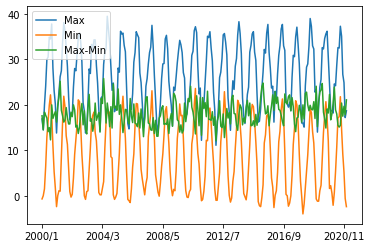

In [23]:
data_Tokyo.plot()

In [71]:
#鳥取と東京の"Max-Min"の結合テーブル
Max_Min = pd.concat([data_Tokyo,data_Tottori],axis="columns")
Max_Min = Max_Min.drop(columns={"Max","Min"})
Max_Min.columns = {"Tokyo","Tottori"}
Max_Min

,Tokyo,Tottori
2000/1,17.6,20.7
2000/2,14.5,16.0
2000/3,18.4,21.9
2000/4,17.7,20.6
2000/5,17.1,22.3
...,...,...
2020/9,20.4,23.7
2020/10,17.5,21.5
2020/11,19.7,21.7
2020/12,17.8,16.6


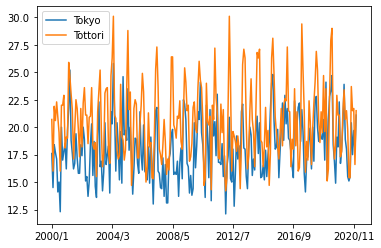

In [72]:
Max_Min.plot()

In [73]:
#鳥取の標準偏差
print("Tottori:" + str(Max_Min.Tottori.std()))
#東京の標準偏差
print("Tokyo  :" + str(Max_Min.Tokyo.std()))

Tottori:3.4027486647470155
Tokyo  :2.7785958265914257


　標準偏差が各データがどの程度散らばり具合を示す。
よってここでは、寒暖差が大きいか小さいかという違いになると思う。

　農家さんだったりの事情でもない限りは、寒暖差は小さいに越したことはないと思う。

# それぞれでソートしヒストグラムにする

In [105]:
Tottori = Max_Min["Tottori"]
Tottori = Tottori.reset_index()
#Tottori = Tottori.drop("index",axis=1)
Tottori = Tottori.rename(columns={"Tottori":"Temperature difference"})
Tottori = Tottori.sort_values("Temperature difference")
Tottori

,index,Temperature difference
144,2012/1,14.2
132,2011/1,14.3
156,2013/1,14.4
66,2005/7,14.7
126,2010/7,14.7
...,...,...
63,2005/4,28.8
232,2019/5,29.0
207,2017/4,29.4
51,2004/4,30.1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c5a2c1510>]],
      dtype=object)

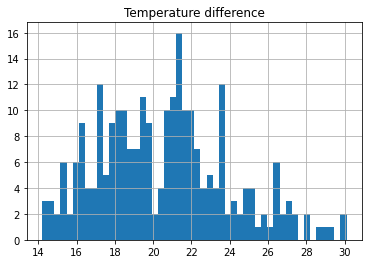

In [120]:
Tottori.hist(bins=50)

In [121]:
Tokyo = Max_Min["Tokyo"]
Tokyo = Tokyo.reset_index()
Tokyo = Tokyo.rename(columns={"Tokyo":"Temperature difference"})
Tokyo = Tokyo.sort_values("Temperature difference")
Tokyo

,index,Temperature difference
144,2012/1,12.1
7,2000/8,12.3
151,2012/8,12.8
84,2007/1,13.0
96,2008/1,13.1
...,...,...
59,2004/12,24.6
232,2019/5,24.7
183,2015/4,24.8
15,2001/4,25.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c5a4fe990>]],
      dtype=object)

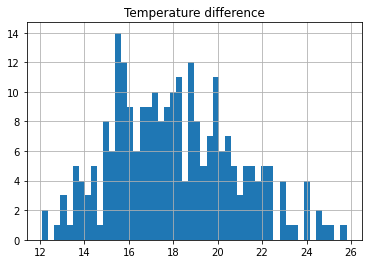

In [122]:
Tokyo.hist(bins=50)

　目視でだいたい正規分布に従ってそうな気はする。
ちゃんと調べることもできるらしく、キーワードとして正規性やT検定ということがなんとなくわかったが今回はやめておく。